<center> <h1>Fatalities in car accidents by miles driven</h1></center>

In [1045]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [1046]:
df = pd.read_csv("cars_fatalities.csv")
df.head()

,Year,Fatalities,Vehicles,Miles
0,1930,32900,26.7,206
1,1931,33700,26.1,216
2,1932,29500,24.4,200
3,1933,31363,24.2,201
4,1934,36101,25.3,216


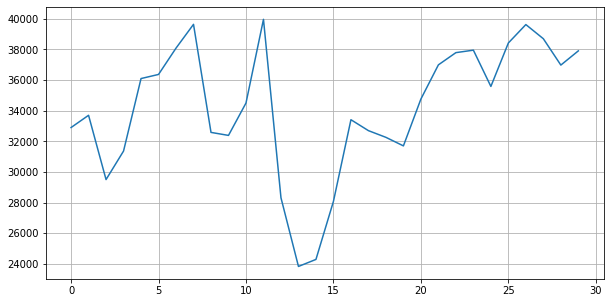

In [1047]:
df['Fatalities'].plot(figsize=(10,5), grid=True)
plt.show()


In [1048]:
df['Fatalities'].mean()/df['Miles'].mean()

91.04967621751088

<AxesSubplot:>

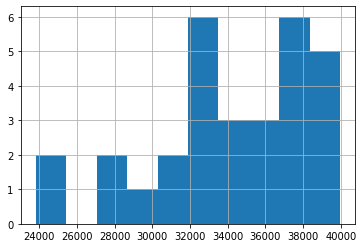

In [1049]:
df["Fatalities"].hist(bins =10)

In [1050]:
model1_ppc=CmdStanModel(stan_file='first_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [1051]:
R = 1000
sim=model1_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


<AxesSubplot:>

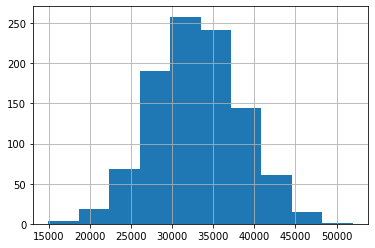

In [1052]:
sim = sim.draws_pd()
sim['deaths'].hist()

In [1053]:
model2_ppc=CmdStanModel(stan_file='second_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [1054]:
R = 1000
fit=model2_ppc.sample(data=dict(N = len(df), deaths = df.Fatalities.values), seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed                     
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                     


INFO:cmdstanpy:CmdStan done processing.


In [1055]:
az.summary(fit, var_names=['mu','sigma','death'],round_to=2, kind='stats')

,mean,sd,hdi_3%,hdi_97%
mu,34177.60,741.56,32814.40,35601.10
sigma,4192.01,520.22,3235.64,5165.12
death,34110.15,4394.03,25805.00,42363.70


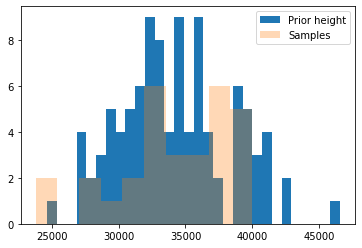

In [1056]:
fit = fit.draws_pd()
fit['death'][0:100].hist(bins=30)
df['Fatalities'].hist(alpha=0.3)
plt.legend(['Prior height', 'Samples'])
plt.grid()
plt.show()


<center><h1>FIRST MODEL</h1></center>

In [1057]:
model_1_fit=CmdStanModel(stan_file='first_fit.stan')

INFO:cmdstanpy:compiling stan file C:\Users\Filip\Desktop\projekt\Projekt\Project\first_fit.stan to exe file C:\Users\Filip\Desktop\projekt\Projekt\Project\first_fit.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Filip\Desktop\projekt\Projekt\Project\first_fit.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Filip/Desktop/projekt/Projekt/Project/first_fit.hpp C:/Users/Filip/Desktop/projekt/Projekt/Project/first_fit.stan
Warning in 'C:/Users/Filip/Desktop/projekt/Projekt/Project/first_fit.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Filip/Desktop/projekt/Projekt/Project/first_fit.stan', line 25, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed 

In [1058]:
data_fit={'N':len(df), 'Miles':df['Miles'], 'deaths':df['Fatalities']}
fit=model_1_fit.sample(data=data_fit,seed=29042020)
fit_car_lin = fit

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [1059]:
beta = fit.stan_variable('beta')
alpha = fit.stan_variable('alpha')
az.summary(fit, var_names=['beta','sigma','alpha'],round_to=2, kind='stats')

,mean,sd,hdi_3%,hdi_97%
beta,14.35,1.75,11.29,17.74
sigma,1546.45,77.11,1407.75,1695.72
alpha,28829.96,714.07,27420.00,30098.30


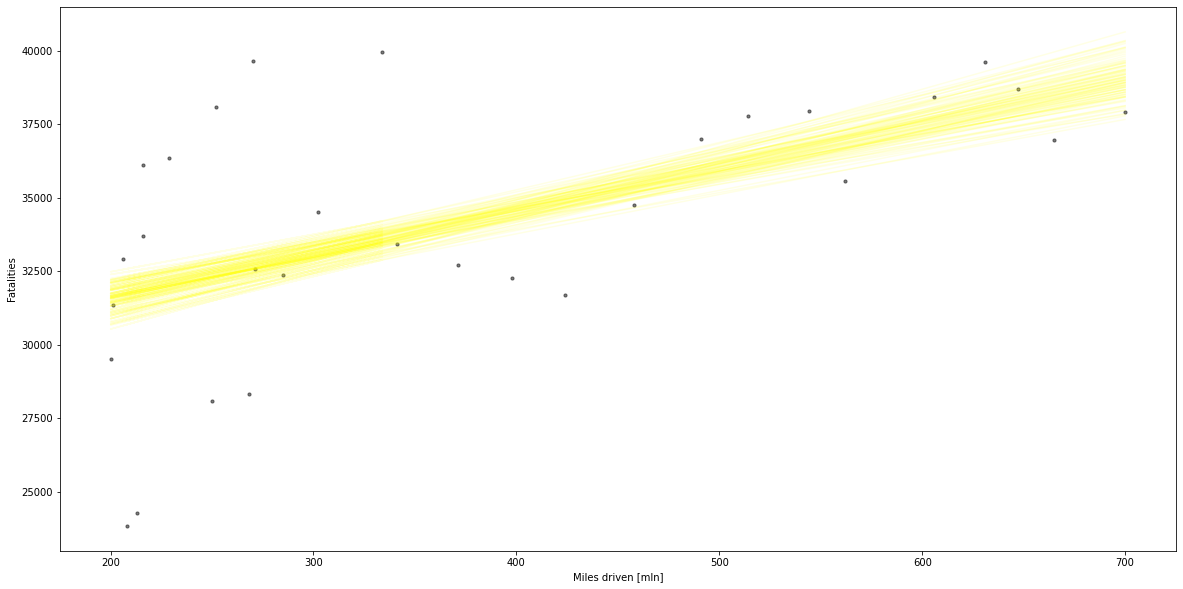

In [1060]:
fig, axes = plt.subplots(1,1,figsize=(20,10))
for i in range(100):
    axes.plot(df.Miles,
    alpha[i]+beta[i]*df.Miles, alpha=0.1, color='yellow')
plt.xlabel("Miles driven [mln]")
plt.ylabel("Fatalities")
axes.scatter(df.Miles, df.Fatalities, color='black',alpha=0.5,s=10)

    

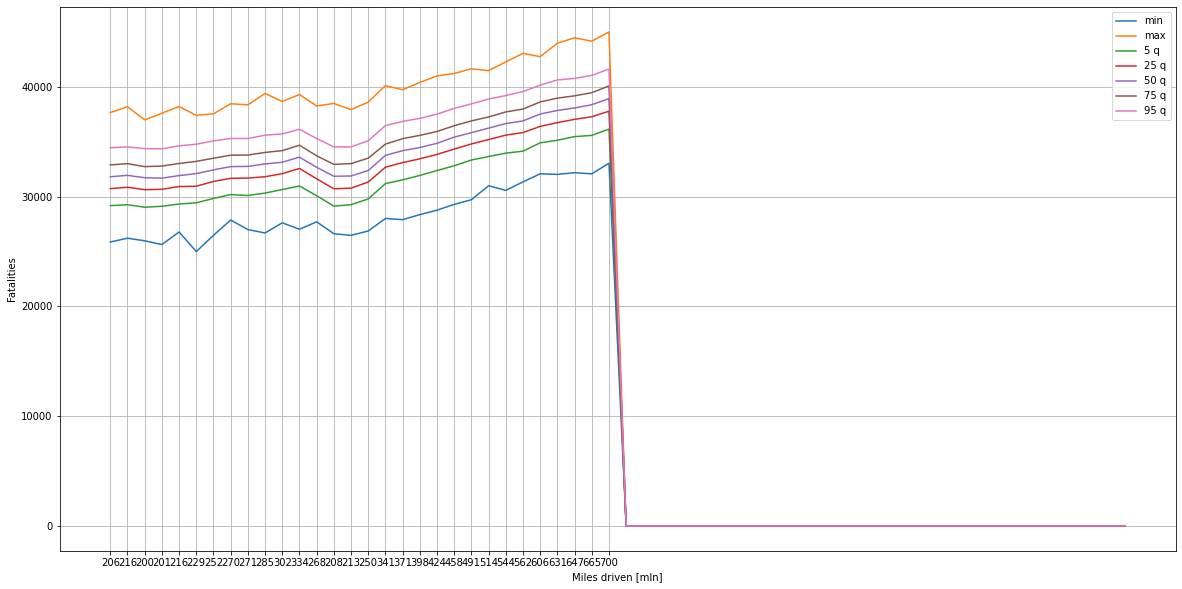

In [1061]:
# alpha_sim=sim.stan_variable('alpha')
# beta_sim=sim.stan_variable('beta')
# fig, axes = plt.subplots(1,1,figsize =(7,4))
# axes.hlines([0,50000],xmin=df.Miles.min(),xmax=df.Miles.max(),linestyle = "--",color = "black")
# for i in range(50):
#     axes.plot(df.Miles,alpha_sim[i]+beta_sim[i]*df.c_miles,alpha=0.5,linewidth =0.5)
# axes.set_xlabel('Miles driven[mln]')
# axes.set_ylabel('Fatalities')
# plt.show()
fit_height = fit.draws_pd()
fit_height = fit_height.loc[:,'death[1]':'death[31]']
data2 = {'min' : fit_height.min(),
        'max' : fit_height.max(),
        '5 q' : fit_height.quantile(0.05),
        '25 q' : fit_height.quantile(0.25),
        '50 q' : fit_height.quantile(0.5),
        '75 q' : fit_height.quantile(0.75),
        '95 q' : fit_height.quantile(0.95)}

fit_data = pd.DataFrame(data2)
fit_data.plot(figsize=(20,10))
plt.xlabel("Miles driven [mln]")
plt.ylabel("Fatalities")
default_x_ticks = range(len(df.Miles))
plt.xticks(default_x_ticks, df.Miles)
plt.grid()


In [1062]:
fit_height

,death[1],death[2],death[3],death[4],death[5],death[6],death[7],death[8],death[9],death[10],...,log_lik[21],log_lik[22],log_lik[23],log_lik[24],log_lik[25],log_lik[26],log_lik[27],log_lik[28],log_lik[29],log_lik[30]
0,28832.2,31699.1,32394.7,32913.3,32694.5,34741.0,30346.2,32719.2,33212.5,31499.3,...,-11.84280,-8.34492,-8.30919,-11.42210,-8.36476,-8.75312,-10.03970,-8.94712,-9.25184,-9.84144
1,31287.4,30441.7,30548.3,31089.7,31754.4,31178.8,32265.5,32833.0,32283.1,35855.0,...,-8.37014,-8.23947,-8.76469,-8.85489,-10.35760,-8.36249,-8.48861,-9.04460,-8.63019,-8.36034
2,31646.6,28512.5,31367.8,31866.8,31859.1,31742.2,30027.3,30264.9,30951.4,37119.3,...,-8.24797,-8.24555,-8.23828,-8.66347,-8.72802,-8.24298,-8.58519,-8.28606,-8.24286,-9.86395
3,34152.5,32501.3,31226.4,29950.6,31608.4,31797.5,32259.0,32021.8,30091.8,32625.3,...,-8.69603,-8.91372,-8.81860,-8.91469,-9.30392,-8.52940,-8.76794,-8.31343,-9.76293,-8.32736
4,32143.0,34584.9,32304.4,36120.4,31535.4,28594.7,35536.0,29005.6,32810.9,32769.9,...,-8.86618,-9.07080,-8.65084,-8.36240,-8.74323,-8.30089,-8.57420,-8.30132,-8.40969,-9.22722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,32139.1,31700.0,32874.2,32124.1,33362.8,32795.9,30507.2,33162.4,32465.2,33880.4,...,-8.33477,-8.40570,-8.44092,-8.46825,-8.30022,-11.17700,-10.06300,-9.74181,-8.72152,-8.70161
3996,33038.9,28590.6,31333.3,31099.0,32035.7,32688.6,34296.6,31003.2,34561.4,33201.5,...,-8.21622,-9.71378,-8.23156,-8.23510,-9.21227,-8.48595,-8.64677,-8.22376,-8.22684,-8.27767
3997,31151.0,31694.0,31748.3,32204.8,33163.0,31927.4,30964.4,32846.4,35087.5,31225.4,...,-8.28265,-8.47299,-8.28253,-8.31916,-8.51706,-8.35046,-8.68216,-8.92033,-8.66876,-8.28265
3998,32020.0,31182.2,30442.5,29675.7,34668.2,31654.7,31842.1,33425.4,33874.3,34027.2,...,-8.96968,-9.23622,-9.49965,-8.23732,-8.29119,-9.20898,-8.35327,-9.57435,-8.26829,-8.59614


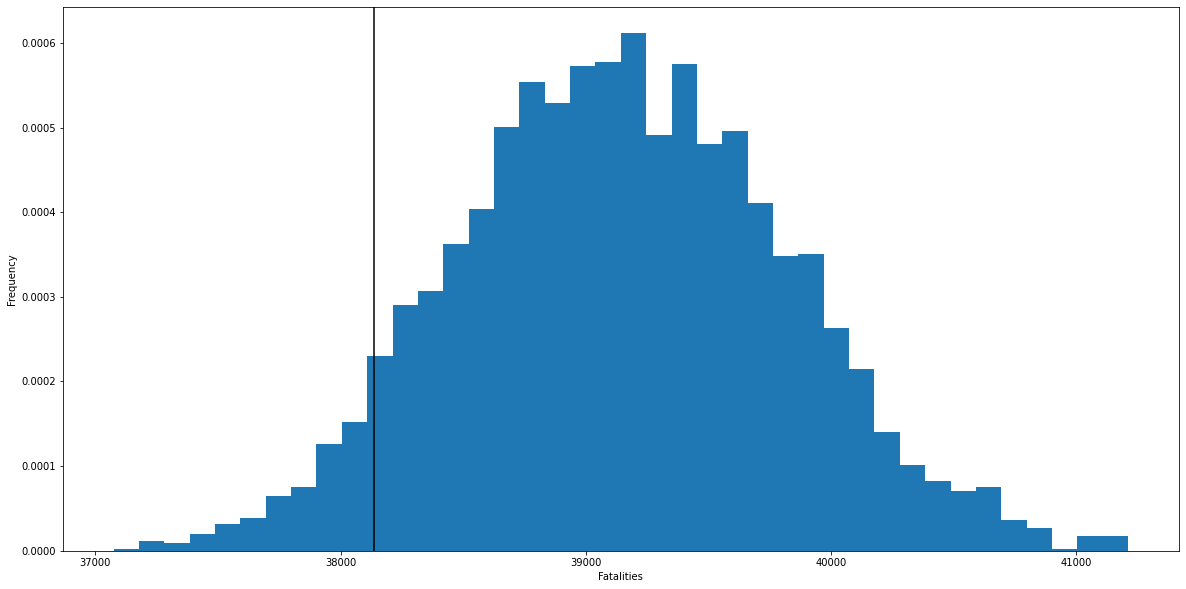

In [1063]:
mu3500 = alpha+beta*(719)
fig, ax = plt.subplots(1,1,figsize=(20,10))
ax.hist(mu3500,bins=40,density=True)
plt.axvline(x = 38137, color = 'black', label = 'Actual data for 201mln miles')
plt.xlabel("Fatalities")
plt.ylabel("Frequency")
plt.show()

LINEAR MODEL HISTOGRAMS WITH ACTUAL VALUE

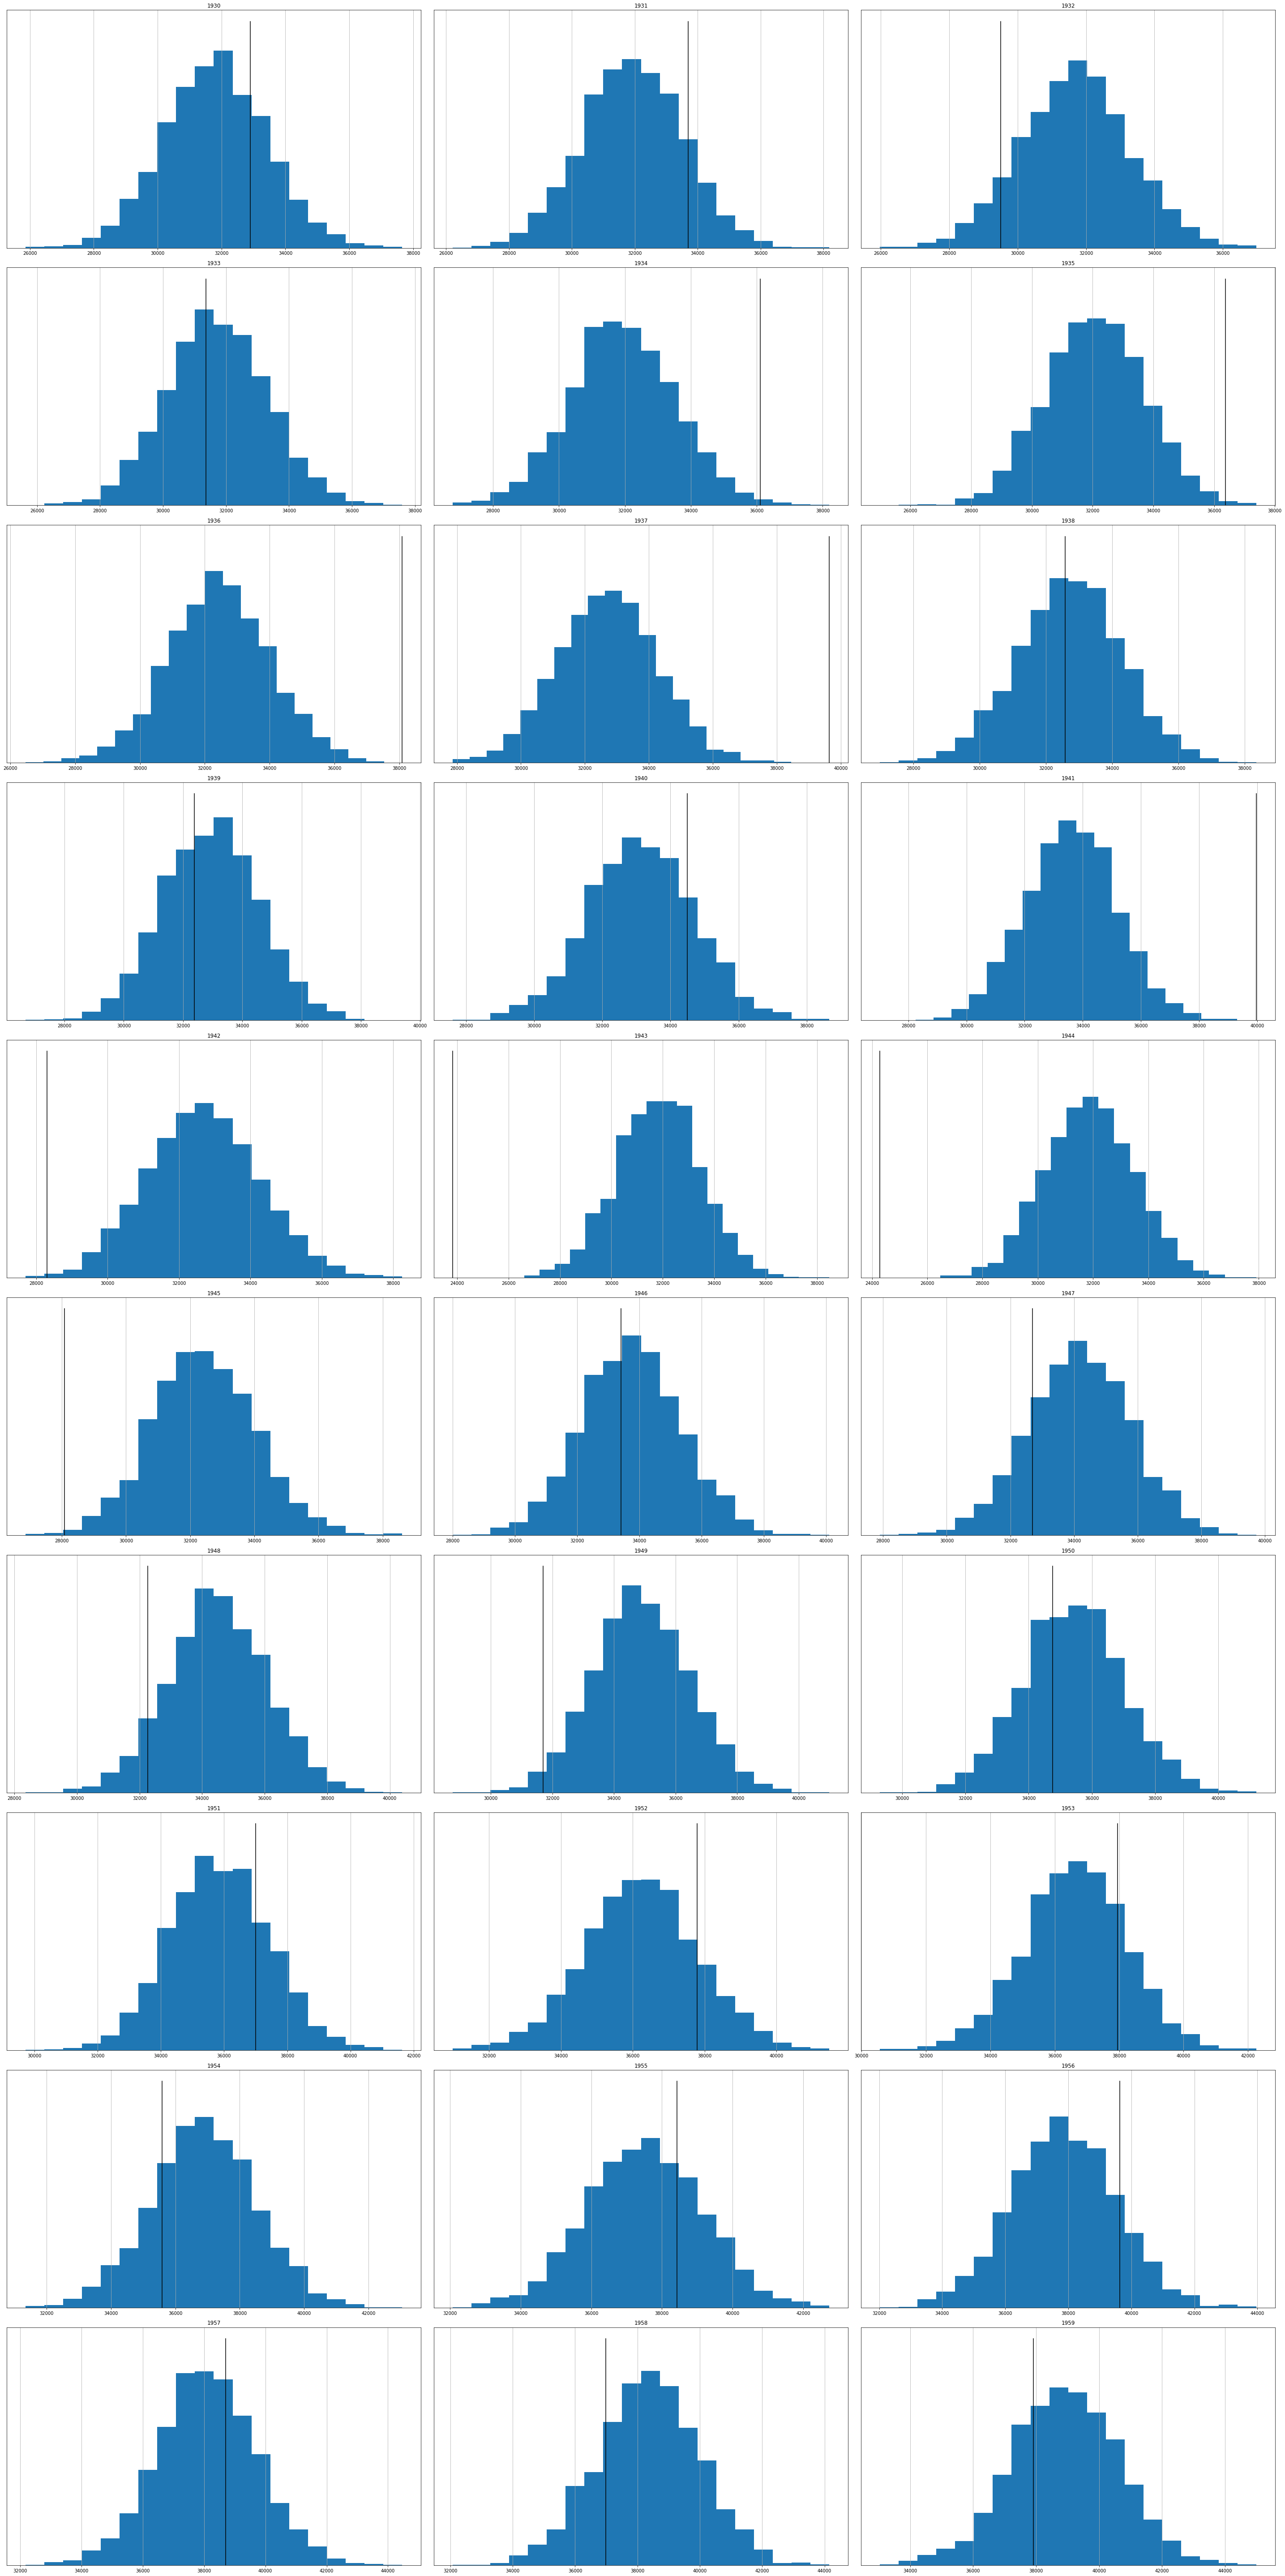

In [1064]:
aaa = fit_height
fig, axes = plt.subplots(10, 3, figsize=(40, 80), sharey=True, squeeze=False)
axes_flat = axes.flatten()
tvn = df["Fatalities"].tolist()
for k, ax in enumerate(axes_flat):
    string = "death["+ str(k+1) + "]"
    ax.hist(fit_height[string], bins=20)
    ax.set_title(df['Year'][k])
    tv=tvn[k]
    ax.plot([tv, tv], [0, 700], color='black')
    ax.set_yticks([])
    ax.grid()
fig.tight_layout()
plt.show()

<center><h1>DRUGI MODEL</h1></center>

In [1065]:
prob = 365*1500.
root_of_lam = np.polynomial.polynomial.polyroots([-1*prob,3.,1.])
lam_ub = np.round(root_of_lam[root_of_lam > 0]**2)

In [1066]:
deaths = []
dta_cnt = []
for k in df['Fatalities']:  
    dta_cnt.append(-(1. + deaths.count(k)))
    deaths.append(k)
dta_cnt = np.array(dta_cnt)

In [1067]:
model = CmdStanModel(stan_file='prior_tune.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [1068]:
data = dict(y_guess=np.array([np.log(100000)]), theta=np.array(lam_ub))
sim = model.sample(data=data,
                     iter_sampling=1, 
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=1052020)
sigma = np.round(sim.stan_variable('sigma')[0])
print(sigma)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.



211693.0


In [1069]:
import math
def rounds(x):
    n = -1
    t = x
    while t>1:
        n += 1
        t = t/10
    dif = 10**n
    rou = int(math.ceil(x / dif)) * dif
    if rou-x>dif/2:
        rou = rou - dif/2
    return int(rou)

FIGURE OF POISSON DISTRIBUTION

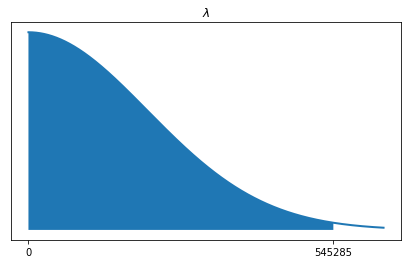

In [1070]:
fig, ax2 = plt.subplots(1, 1,figsize=(7, 4))
x2 = np.linspace(0, 3*sigma, 1000)
x4 = np.linspace(0, lam_ub[0], 1000)
ax2.plot(x2, 2*stats.norm.pdf(x2,scale=sigma), linewidth=2)
ax2.fill_between(x4, 2*stats.norm.pdf(x4, scale=sigma), 0)
ax2.set_yticks([])
ax2.set_xticks([0, lam_ub[0]])
ax2.set_title(r'$\lambda$')
plt.show()

In [1071]:
model_2 = CmdStanModel(stan_file='prior_pred.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [1072]:
R = 1000
sim_2 = model_2.sample(data=dict(M = 1, sigma=int(sigma)),
                     iter_sampling=R, 
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=2902020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


C:\Users\Filip\AppData\Local\Temp\ipykernel_12084\1122288886.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax1.annotate('HalfNormal(0,' + str(np.int(sigma)) + ')', xy=(150,arr_y_loc), xytext=(200,1.5*arr_y_loc), arrowprops={'arrowstyle':'->'})


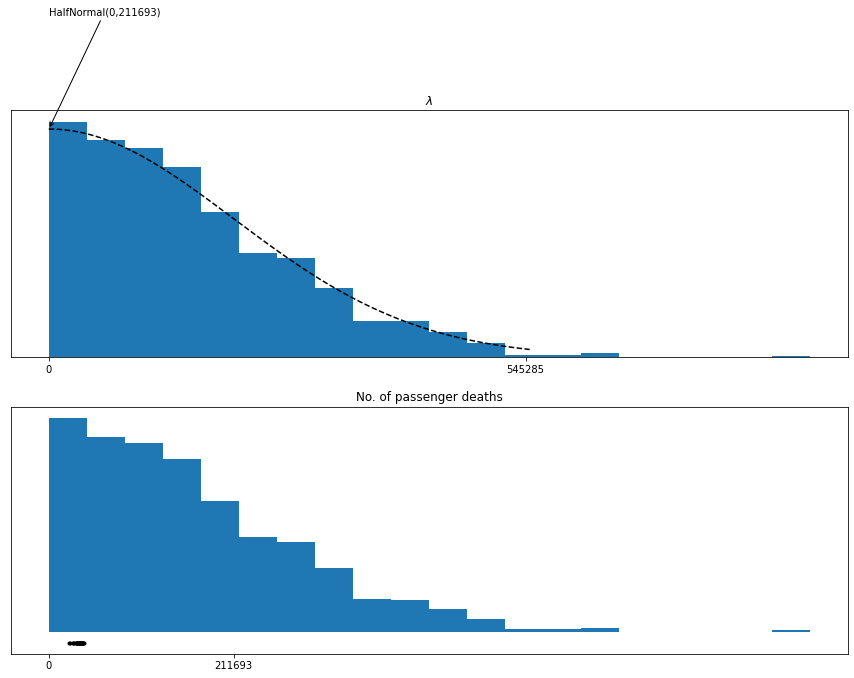

In [1073]:
theta = sim_2.stan_variable('lambda')
y_sim = sim_2.stan_variable('y_sim')
fig, axes = plt.subplots(2, 1,figsize=(15, 10))
ax1 = axes[0]
ax1.hist(theta, bins=20, density=True)
x = np.linspace(0, rounds(lam_ub), 1000)
ax1.set_xticks([0, lam_ub[0]])
ax1.set_yticks([])
ax1.set_title(r'$\lambda$')
ax1.plot(x, 2 * stats.norm.pdf(x, 0, sigma), color='black', linestyle='--')
arr_y_loc = 2 * stats.norm.pdf(150,0,sigma)
ax1.annotate('HalfNormal(0,' + str(np.int(sigma)) + ')', xy=(150,arr_y_loc), xytext=(200,1.5*arr_y_loc), arrowprops={'arrowstyle':'->'})
ax2 = axes[1]
ax2.hist(y_sim.flatten(), density=True, bins=20, zorder=1)
ax2.scatter(deaths, 0.0000002 * dta_cnt, color='black', marker='.', zorder=2)
ax2.set_xticks([0,sigma])
ax2.set_yticks([])

ax2.set_title('No. of passenger deaths')
plt.show()

In [1074]:
model_car = CmdStanModel(stan_file='car_posterior.stan')

INFO:cmdstanpy:compiling stan file C:\Users\Filip\Desktop\projekt\Projekt\Project\car_posterior.stan to exe file C:\Users\Filip\Desktop\projekt\Projekt\Project\car_posterior.exe


In [ ]:
data_car = dict(M = len(df),
                y = np.round(df['Fatalities'].values),
                sigma=int(sigma))
fit_car = model_car.sample(data=data_car, seed=2902020)
lam = fit_car.stan_variable('lambda')
y_sim_c = fit_car.stan_variable('y_sim')

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [ ]:
mean_lam = np.mean(lam)
cinf_lam = az.hdi(lam, 0.89)
hdi_width = cinf_lam[1] - cinf_lam[0]

print('Mean lambda : {:4.2f}'.format(mean_lam))
print('89% confidence interval: [',*['{:4.2f}'.format(k) for k in cinf_lam],']')

Mean lambda : 34214.16
89% confidence interval: [ 34159.20 34267.20 ]


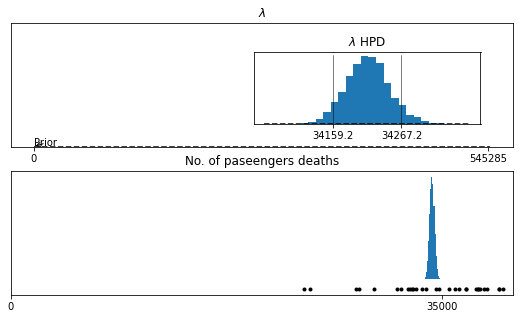

In [ ]:
fig, axes = plt.subplots(2, 1,figsize=(9, 5))
ax1 = axes[0]
ax1.hist(lam, bins=20, density=True)
x = np.linspace(0, int(prob), 1000)

ax1.plot(x, 2 * stats.norm.pdf(x, 0, sigma), color='black', linestyle='--')
arr_y_loc = 2 * stats.norm.pdf(50, 0, sigma)
ax1.annotate(text='Prior', xy=(50, arr_y_loc), xytext=(100, 10 * arr_y_loc), arrowprops={'arrowstyle':'->'})
ax1.set_xticks([0, lam_ub[0]])
ax1.set_yticks([])
ax1.set_title(r'$\lambda$')

ax_sm = plt.axes([0.5,0.6,0.35,0.2])
x_sm = np.linspace(cinf_lam[0]-hdi_width,cinf_lam[1]+hdi_width,200)
ax_sm.hist(lam, bins=20, density=True)
ax_sm.plot(x_sm, 2 * stats.norm.pdf(x_sm, 0, sigma), color='black', linestyle='--')
ax_sm.annotate(text='', xy=(cinf_lam[0] - .2, 0.2), xytext=(cinf_lam[1] + .2, 0.2), arrowprops=dict(arrowstyle='<->'))
ax_sm.plot([cinf_lam[0], cinf_lam[0]], [0, 0.012], color='black', linestyle='-', linewidth=0.5)
ax_sm.plot([cinf_lam[1], cinf_lam[1]], [0, 0.012], color='black', linestyle='-', linewidth=0.5)

ax_sm.set_xticks(np.round([cinf_lam[0], cinf_lam[1]],2))
ax_sm.set_yticks([])
ax_sm.set_title(r'$\lambda$ HPD')


ax2 = axes[1]
ax2.hist(y_sim_c.flatten(), density=True, bins=20, zorder=1)
ax2.scatter(deaths, 0.0002 * dta_cnt, color='black', marker='.', zorder=2)
ax2.set_xticks([0, np.max(y_sim_c)])

ax2.set_yticks([])

ax2.set_title('No. of paseengers deaths')
plt.show()

c:\Users\Filip\anaconda3\envs\Modelowanie\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
c:\Users\Filip\anaconda3\envs\Modelowanie\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
c:\Users\Filip\anaconda3\envs\Modelowanie\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using

<AxesSubplot:xlabel='Log'>

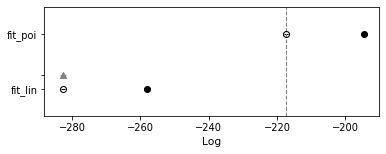

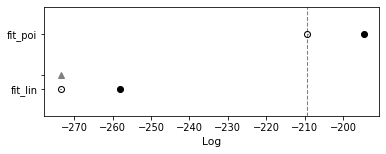

In [ ]:
compare_dict = {'fit_lin': fit_car_lin, 'fit_poi': fit_car}
loo_compare = az.compare(compare_dict, ic="loo")
waic_compare = az.compare(compare_dict, ic="waic")
print(loo_compare)
print(waic_compare)
az.plot_compare(loo_compare)
az.plot_compare(waic_compare)